In [129]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [130]:
# Loading the dataset

Job_postings = pd.read_csv('job_postings.csv')
Job_postings.head()

,Unnamed: 0,Job Posting ID,Job Posting Date,Job Title,Job Title Full,Job Title Additional Info,Job Position Type,Job Position Level,Years of Experience,Job Skills,Job Location,Minimum Pay,Maximum Pay,Pay Rate,Number of Applicants,Company Name,Company Industry,Company Size
0,0,2701524240,1/1/2017,Software Engineer,Software Engineer,Java Full Stack | Remote,Full-time,Entry level,1,"['database', 'javascript', 'agile', 'linux', '...",United States,NaN,NaN,NaN,6.0,"Cardinal Financial Company, Limited Partnership",Financial Services,"1,001-5,000 employees"
1,1,2719108338,1/1/2017,Data Engineer,Senior Azure Data Engineer,NaN,Full-time,Mid-Senior level,2,"['data_lake', 'cloud', 'python', 'spark', 'git...",United States,NaN,NaN,NaN,1.0,Brinks Home,Consumer Electronics,"1,001-5,000 employees"
2,2,2719503370,1/1/2017,Software Engineer,Software Engineer I,NaN,Full-time,Entry level,5,"['mongo', 'oracle', 'microsoft', 'css', 'javas...",United States,NaN,NaN,NaN,16.0,Paycor,Computer Software,"1,001-5,000 employees"
3,3,2734877741,1/1/2017,Business Analyst,Associate Business Analyst,Telecommute,Full-time,Entry level,2,"['agile', 'excel']","Phoenix, AZ",NaN,NaN,NaN,1.0,Optum,Hospital & Health Care,"10,001+ employees"
4,4,2752415616,1/1/2017,Developer,Swift Developer,NaN,Contract,Mid-Senior level,4,"['excel', 'back-end', 'ios', 'swift', 'program...","Richmond, CA",NaN,NaN,NaN,NaN,Toptal,Internet,"1,001-5,000 employees"


## Data Cleaning

In [131]:
# Checking the shape of the dataset

Job_postings.shape

(25114, 18)

In [132]:
# Checking the datatypes of the columns

Job_postings.dtypes

Unnamed: 0                     int64
Job Posting ID                 int64
Job Posting Date              object
Job Title                     object
Job Title Full                object
Job Title Additional Info     object
Job Position Type             object
Job Position Level            object
Years of Experience            int64
Job Skills                    object
Job Location                  object
Minimum Pay                  float64
Maximum Pay                  float64
Pay Rate                      object
Number of Applicants         float64
Company Name                  object
Company Industry              object
Company Size                  object
dtype: object

In [133]:
# Converting Job Posting Date to datetime format

Job_postings['Job Posting Date'] = pd.to_datetime(Job_postings['Job Posting Date'])

In [134]:
Job_postings.dtypes

Unnamed: 0                            int64
Job Posting ID                        int64
Job Posting Date             datetime64[ns]
Job Title                            object
Job Title Full                       object
Job Title Additional Info            object
Job Position Type                    object
Job Position Level                   object
Years of Experience                   int64
Job Skills                           object
Job Location                         object
Minimum Pay                         float64
Maximum Pay                         float64
Pay Rate                             object
Number of Applicants                float64
Company Name                         object
Company Industry                     object
Company Size                         object
dtype: object

In [135]:
# Missing values

Job_postings.isnull().sum()

Unnamed: 0                       0
Job Posting ID                   0
Job Posting Date                 0
Job Title                        0
Job Title Full                   0
Job Title Additional Info    16927
Job Position Type                0
Job Position Level               0
Years of Experience              0
Job Skills                       0
Job Location                     0
Minimum Pay                  23302
Maximum Pay                  23302
Pay Rate                     23302
Number of Applicants          7585
Company Name                    61
Company Industry               219
Company Size                   222
dtype: int64

In [136]:
# Filter the dataset to include relevant job titles
relevant_job_titles = ["Data Analyst", "Data Engineer", "Data Scientist", "Machine Learning Engineer", "Data Science Manager"]

Job_postings = Job_postings[Job_postings['Job Title'].isin(relevant_job_titles)]

Job_postings['Job Title'].value_counts()

Data Engineer                3462
Data Scientist               1999
Data Analyst                 1485
Machine Learning Engineer     283
Data Science Manager           23
Name: Job Title, dtype: int64

#### Job Postings

In [158]:
# Counts of the different job titles compared to each other

Job_postings_count = Job_postings['Job Title'].value_counts().reset_index()
Job_postings_count.columns = ['Job Title', 'Count']

fig = px.bar(
    Job_postings_count, 
    y='Job Title', 
    x='Count', 
    title='Count of Job Postings by Job Title', 
    color = 'Job Title',
    orientation='h', 
    labels={'Job Title': 'Job Title', 'Count': 'Count'},
    text='Count'
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'}, 
    xaxis_title='Count',
    yaxis_title='Job Title',
    width = 1000,
    height = 600
)

fig.show()

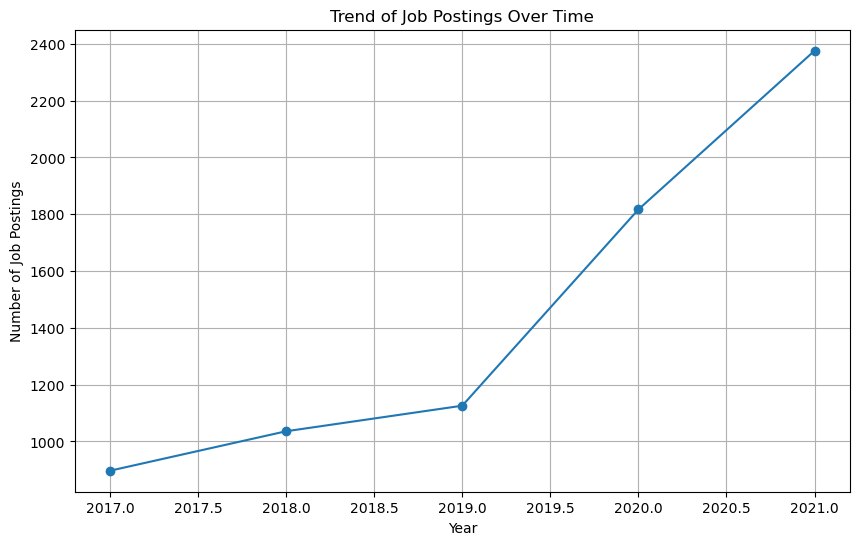

In [159]:
# Trend of job postings over time (by date)

# Create a new column for the year of the job posting
Job_postings['Year'] = Job_postings['Job Posting Date'].dt.year

# Group data by year to analyze the trend of job postings over time
Job_postings_trend = Job_postings.groupby('Year')['Job Posting ID'].count().reset_index()

# Plot the trend of job postings over time
plt.figure(figsize=(10, 6))
plt.plot(Job_postings_trend['Year'], Job_postings_trend['Job Posting ID'], marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Job Postings')
plt.title('Trend of Job Postings Over Time')
plt.grid(True)
plt.show()

In [160]:
# Number of job postings for each 'Job Position Level' across different job titles

# Group by 'Job Position Level' and 'Job Title' and count the number of postings
Job_postings_grouped = Job_postings.groupby(['Job Position Level', 'Job Title']).size().reset_index(name='Count')

fig = px.bar(
    Job_postings_grouped,
    x='Job Position Level',
    y='Count',
    color='Job Title',
    title='Number of Job Postings for Each Job Position Level Across Different Job Titles',
    labels={'Job Position Level': 'Job Position Level', 'Job Title': 'Job Title', 'Count': 'Number of Job Postings'}
)

fig.update_layout(
    xaxis_title='Job Position Level',
    yaxis_title='Number of Job Postings',
    width=1000,
    height=600
)

fig.show()

In [167]:
# Create an average pay column
Job_postings['Average Pay'] = (Job_postings['Minimum Pay'] + Job_postings['Maximum Pay'])/2

# Average pay by job title and Years of Experience
average_pay_per_experience = Job_postings.groupby('Job Title')['Average Pay'].mean().reset_index()

# Average pay by job title and Years of Experience
fig = px.scatter(average_pay_per_experience, 
             x='Job Title', 
             y='Average Pay', 
             color='Job Title', 
             title='Average Pay by Job Title'
             )

fig.update_layout(
    xaxis_title="Job Title",
    yaxis_title="Average Pay",
    legend_title="Job Title",
    width=1000,
    height=600
)

fig.show()

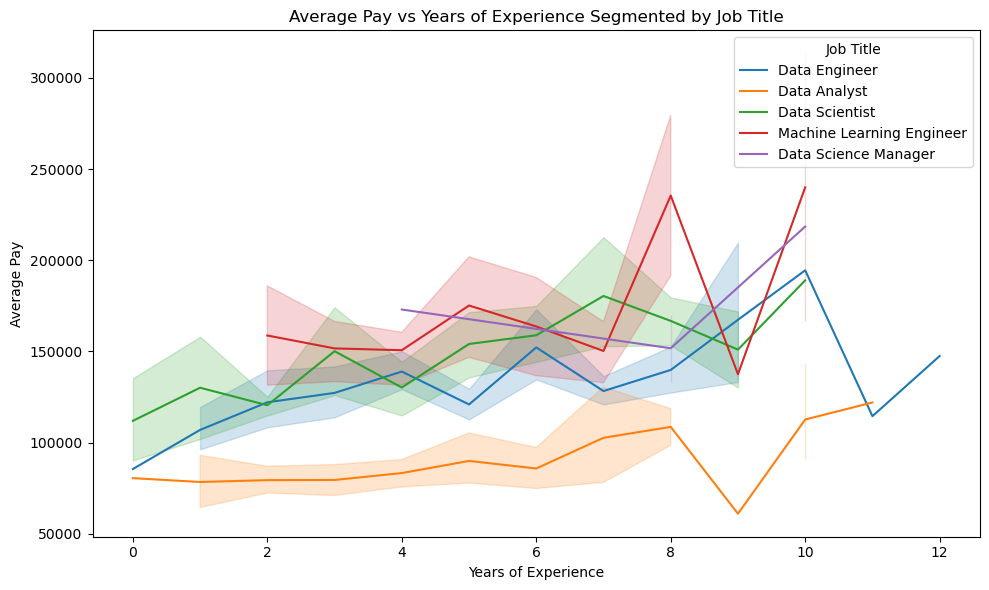

In [179]:
# Visualize the average pay versus years of experience segmented by job title

plt.figure(figsize=(10, 6))
sns.lineplot(x='Years of Experience', y='Average Pay', hue='Job Title', data=Job_postings)
plt.title('Average Pay vs Years of Experience Segmented by Job Title')
plt.xlabel('Years of Experience')
plt.ylabel('Average Pay')
plt.tight_layout()
plt.show()


In [171]:
# Average pay for each 'Job Position Level' across different job titles

average_pay_per_position_level = Job_postings.groupby(['Job Position Level', 'Job Title'])['Average Pay'].mean().reset_index()

fig = px.line(
    average_pay_per_position_level,
    x='Job Position Level',
    y='Average Pay',
    color='Job Title',
    title='Average Pay for Each Job Position Level Across Different Job Titles',
    labels={'Job Position Level': 'Job Position Level', 'Job Title': 'Job Title', 'Average Pay': 'Average Pay'}
)

fig.update_layout(
    xaxis_title='Job Position Level',
    yaxis_title='Average Pay',
    width=1000,
    height=600
)

fig.show()

In [172]:
# Duplicate the main dataset

Job_postings2 = Job_postings.copy()

# Retain only the relevant columns

Job_postings2 = Job_postings2[['Job Posting ID', 'Job Skills']]

# Clean the 'Job Skills' column to remove unwanted characters
# and split it by comma delimiter to create a row for each skill along with the associated Job Posting ID
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('[', '')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace(']', '')
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace("'", "")
Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace(' ', '')

# Split the 'Job Skills' column by comma and create a new row for each skill
Job_postings2 = Job_postings2.dropna(subset=['Job Skills'])
Job_postings2 = Job_postings2.assign(**{'Job Skills':Job_postings2['Job Skills'].str.split(',')}).explode('Job Skills')

# Remove rows with a blank 'Job Skills' column
Job_postings2 = Job_postings2[Job_postings2['Job Skills'].str.strip() != '']

# Display the first 5 rows of the dataset
Job_postings2.head()

C:\Users\HomePC\AppData\Local\Temp\ipykernel_9284\928925891.py:11: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\HomePC\AppData\Local\Temp\ipykernel_9284\928925891.py:12: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Job Posting ID,Job Skills
1,2719108338,data_lake
1,2719108338,cloud
1,2719108338,python
1,2719108338,spark
1,2719108338,github


In [173]:
# Checking the job skills column

Job_postings2['Job Skills'].unique()

array(['data_lake', 'cloud', 'python', 'spark', 'github', 'warehousing',
       't-sql', 'ci/cd', 'sql', 'apache', 'azure', 'scala', 'coding',
       'data_lakes', 'hadoop', 'devops', 'iot', 'aws', 'pyspark',
       'redshift', 'etl', 'nosql', 'machine_learning', 'database', 'ibm',
       'oracle', 'microsoft', 'programming', 'postgresql', 'linux', 'go',
       'power_bi', 'gcp', 'sap', 'bi', 'saas', 'tableau', 'atlassian',
       'powerbi', 'excel', 'r', 'ai', 'back-end', 'java', 'javascript',
       'mysql', 'git', 'scrum', 'airflow', 'agile', 'mongo', 'cognos',
       'dax', 'sas', 'jira', 'snowflake', 'agile/scrum', 'spss',
       'codebase', 'ml', 'pytorch', 'tensorflow', 'mlops', 'server',
       'pandas', 'slack', 'twilio', 'ai/ml', 'ruby', 'node.js', 'looker',
       'redis', 'postgres', 'macros', 'vba', 'docker', 'c', 'bash',
       'alteryx', 'word', 'perl', 'shell', 'json', 'kanban', 'bitbucket',
       'powerpoint', 'rust', 'kotlin', 'mongodb', 'css', 'html', 'rshiny',
    

In [140]:
# Replacing "power_bi" with "powerbi"

Job_postings2['Job Skills'] = Job_postings2['Job Skills'].str.replace('power_bi', 'powerbi')

In [174]:
# Top 10 most demanded skills in the job market
skills_distribution = Job_postings2['Job Skills'].value_counts().reset_index()
skills_distribution.columns = ['Job Skills', 'Count']

# Get the top 10 most demanded skills
top_10_skills = skills_distribution.head(10)

# Plot the distribution of the top 10 most demanded skills
fig = px.bar(
    top_10_skills,
    x='Job Skills',
    y='Count',
    color='Job Skills',
    title='Top 10 Most Demanded Skills in the Job Market',
    labels={'Job Skills': 'Job Skills', 'Count': 'Count'}
)

fig.update_layout(
    xaxis_title='Job Skills',
    yaxis_title='Count',
    width=1000,
    height=600
)

fig.show()

In [149]:
# Calculate the total number of job postings for each job title
Total_postings = Job_postings.groupby('Job Title')['Job Posting ID'].nunique().reset_index(name='Total Job Postings')

# Calculate the count of each skill for each job posting
Skills_count = Job_postings2.groupby(['Job Posting ID', 'Job Skills']).size().reset_index(name='Skill Count')

# Merge Job_postings2 with Job_postings to get Job Title
Skills_count = pd.merge(Skills_count, Job_postings[['Job Posting ID', 'Job Title']], on='Job Posting ID')

# Merge the data to calculate the likelihood of each skill appearing in a job posting for each job title
Skills_likelihood = pd.merge(Skills_count, Total_postings, on='Job Title')
Skills_likelihood['Likelihood'] = (Skills_likelihood['Skill Count'] / Skills_likelihood['Total Job Postings']) * 100

Skills_likelihood.head()


,Job Posting ID,Job Skills,Skill Count,Job Title,Total Job Postings,Likelihood
0,1959960383,etl,1,Data Engineer,3462,0.028885
1,1959960383,hadoop,1,Data Engineer,3462,0.028885
2,1959960383,java,1,Data Engineer,3462,0.028885
3,1959960383,perl,1,Data Engineer,3462,0.028885
4,1959960383,programming,1,Data Engineer,3462,0.028885


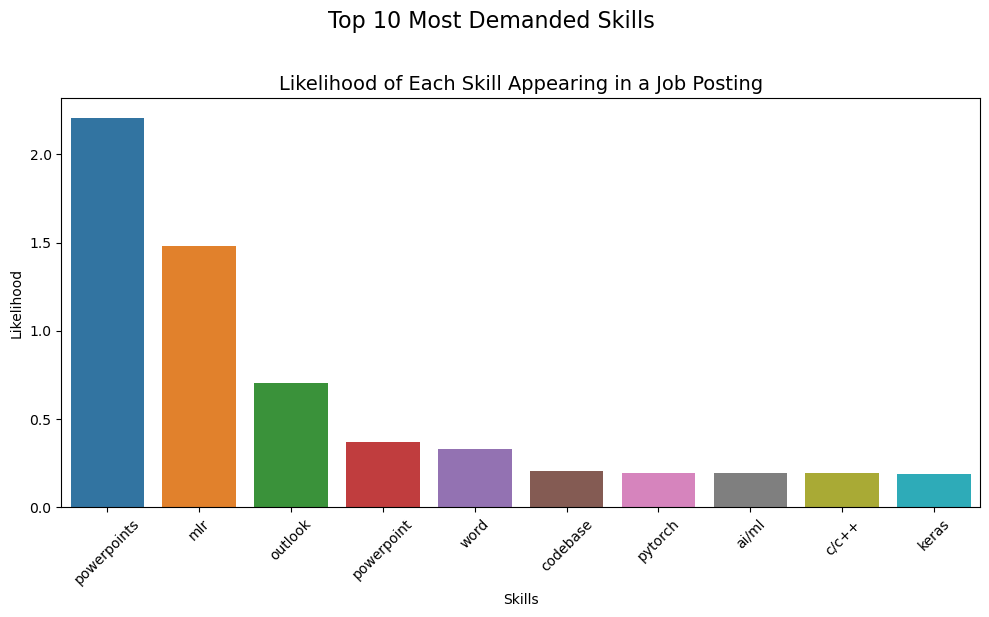

In [150]:
# Likelihood of each skill appearing in a job posting for each job title
top_skills = Skills_likelihood.groupby('Job Skills')['Likelihood'].mean().reset_index()
top_skills = top_skills.nlargest(10, 'Likelihood')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_skills, x='Job Skills', y='Likelihood', order=top_skills.sort_values('Likelihood', ascending=False)['Job Skills'])
plt.suptitle('Top 10 Most Demanded Skills ', fontsize=16, y=1.02)
plt.title('Likelihood of Each Skill Appearing in a Job Posting', fontsize=14, y=1.00)
plt.xlabel('Skills')
plt.ylabel('Likelihood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [151]:
# Group data by 'Company Industry' to find the average years of experience, the count of postings, and the most common job position level for each industry
industry_analysis_data = Job_postings.groupby('Company Industry').agg(
    Average_Years_of_Experience=('Years of Experience', 'mean'),
    Posting_Count=('Job Posting ID', 'nunique'),
    Most_Common_Job_Position_Level=('Job Position Level', lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')
).reset_index()

# Display the first few rows of the result
industry_analysis_data.head()

,Company Industry,Average_Years_of_Experience,Posting_Count,Most_Common_Job_Position_Level
0,2 school alumni,5.000000,3,Mid-Senior level
1,Airlines/Aviation,2.000000,1,Entry level
2,Apparel & Fashion,3.133333,15,Entry level
3,Automotive,2.166667,24,Entry level
4,Aviation & Aerospace,3.333333,3,Mid-Senior level


In [152]:
# Filter down to the top 10 industries by the number of job postings
top_10_industries = industry_analysis_data.nlargest(10, 'Posting_Count')

# Display the top 10 industries
top_10_industries

,Company Industry,Average_Years_of_Experience,Posting_Count,Most_Common_Job_Position_Level
49,Internet,4.888140,2226,Mid-Senior level
82,Staffing & Recruiting,4.992355,1308,Mid-Senior level
46,Information Technology & Services,4.403330,1081,Mid-Senior level
14,Computer Software,3.989770,782,Mid-Senior level
30,Financial Services,4.019417,309,Mid-Senior level
40,Hospital & Health Care,3.819328,238,Associate
58,Marketing & Advertising,4.052632,114,Associate
56,Management Consulting,4.712871,101,Mid-Senior level
38,"Health, Wellness & Fitness",3.510000,100,Associate
47,Insurance,3.595960,99,Entry level


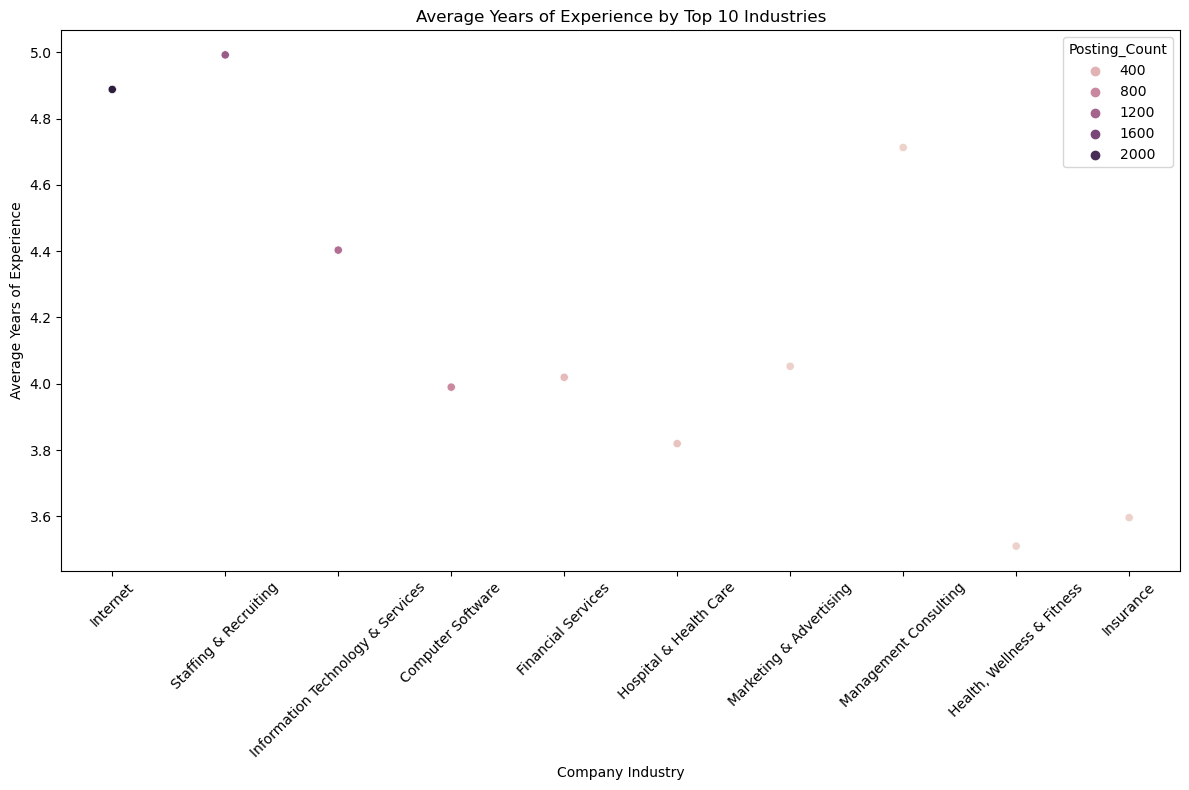

In [153]:
# Visualize the average years of experience by top 10 industries

plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_10_industries, x='Company Industry', y='Average_Years_of_Experience', hue='Posting_Count')
plt.title('Average Years of Experience by Top 10 Industries')
plt.xlabel('Company Industry')
plt.ylabel('Average Years of Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

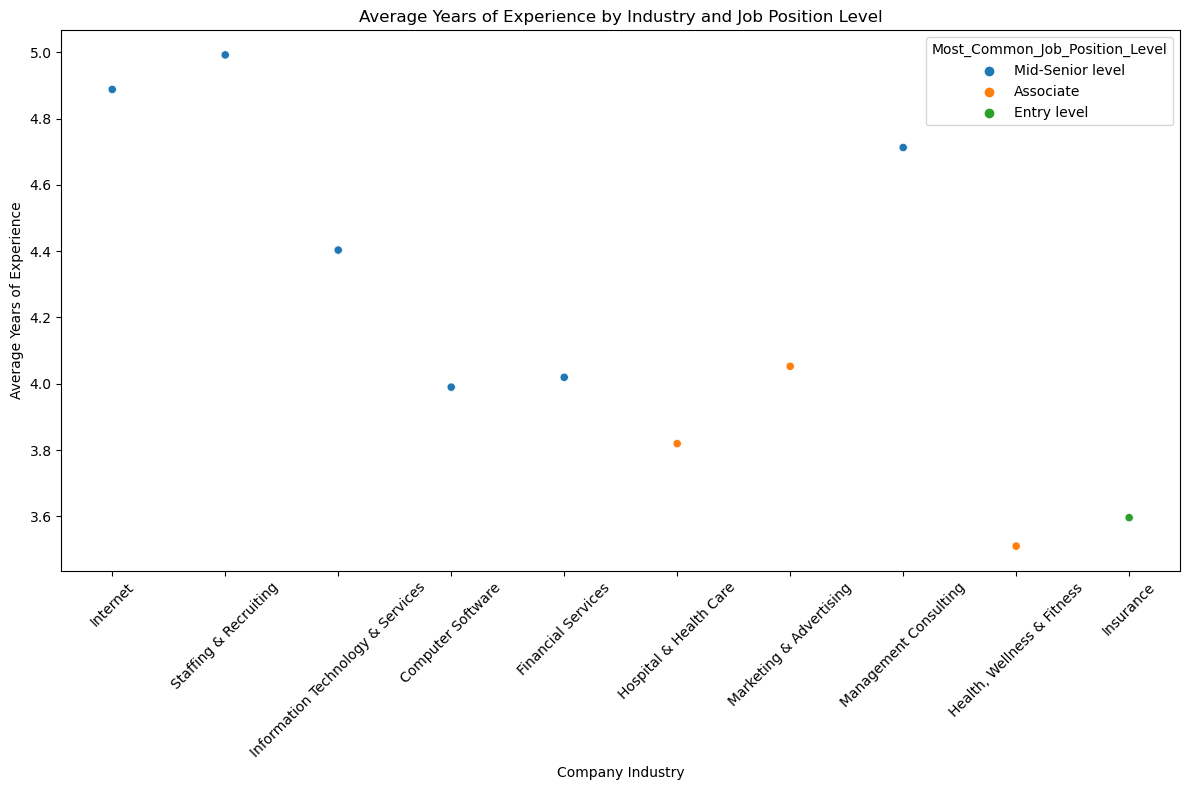

In [154]:
# Visualize the average years of experience by industry and job position level

plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_10_industries, x='Company Industry', y='Average_Years_of_Experience', hue='Most_Common_Job_Position_Level')
plt.title('Average Years of Experience by Industry and Job Position Level')
plt.xlabel('Company Industry')
plt.ylabel('Average Years of Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()